<a href="https://colab.research.google.com/github/caiobellezi/Analise_AirBnB_Berlin/blob/master/Analisando_os_Dados_do_Airbnb_Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">
 
#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*
 
---
 
# Análise dos Dados do Airbnb - *Berlin*
 
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!
 
Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.
 
No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.
 
Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
 
<div class='pixels-photo'><center>
<a href='https://500px.com/photo/1017028511/Siegessäule-Berlin-by-Caio-Bellezi' alt='Siegessäule Berlin by Caio Bellezi on 500px.com'>
  <img src='https://drscdn.500px.org/photo/1017028511/m%3D900/v2?sig=b677738d879f48a7720d5ae1bade63d4f8c63269497ccdb32e5bd006c8c98c6a' alt='Siegessäule Berlin by Caio Bellezi on 500px.com' />
</a></center>
</div>

<script type='text/javascript' src='https://500px.com/embed.js'></script>
 
 
**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/germany/be/berlin/2020-05-14/visualisations/listings.csv')
df_munique = pd.read_csv('http://data.insideairbnb.com/germany/bv/munich/2020-04-25/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Código de indentificação do imóvel
* `nome` - Nome da propriedade
* `host_id` - Id do proprietário
* `host_name` - nome do proprietário 
* `neighbourhood_group` - Região onde o bairro está localizado
* `neighbourhood` - Bairro onde está localizado
* `latitude` - Latitude onde se encontra o imóvel
* `longitude` - Longitude onde se encontra o imóvel
* `room_type` - Tipo de quarto oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade minima de noites para alugar o imóvel
* `number_of_reviews` - Quantidade de avaliações do imóvel
* `last_review` - Quando foi realizada a última avaliação do imóvel
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário
* `availability_365` - número de dias de disponibilidade dentro de 1 ano

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,60,4,132,2020-04-03,2.65,7,180
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.09,1,0
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.33,1,364
3,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.24,2,78
4,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.14,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print('O data set possui {} entradas e {} variáveis\n'.format(df.shape[0],df.shape[1]))
print("Os tipos das variáveis são:")
print(df.dtypes)



O data set possui 24678 entradas e 16 variáveis

Os tipos das variáveis são:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Dados ausentes podem ser um problema na hora de analisar o dataset, por este motivo é sempre importante verificar quais são e quantos são.

Poderiamos visualizar a quantidade de entradas faltantes, mas é mais pragmático saber a proporção de dados faltantes em relação ao total do dataset.
* As variáveis `reviews_per_month` e `last_review` apresentam valores nulos em mais de 18% das linhas
* Está faltando cerca de 0,2% dos nomes das locações
* O nome do proprietário não é informado em menos de 0,1% das locações

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / len(df)).sort_values(ascending=False)

reviews_per_month                 0.183807
last_review                       0.183807
name                              0.002026
host_name                         0.000851
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis irei plotar o histograma
Podemos rápidamente tirar algumas conclusões:
* A maioria dos imóveis estão disponivéis em temporadas, ou seja, poucos dias no ano;
* Alguns poucos proprietários possuem uma grande quantidade de imóveis para alugar;
* Pouco imóveis requerem aluguéis de longo prazo;
* Alguns poucos imóveis tem preços extramemente altos.

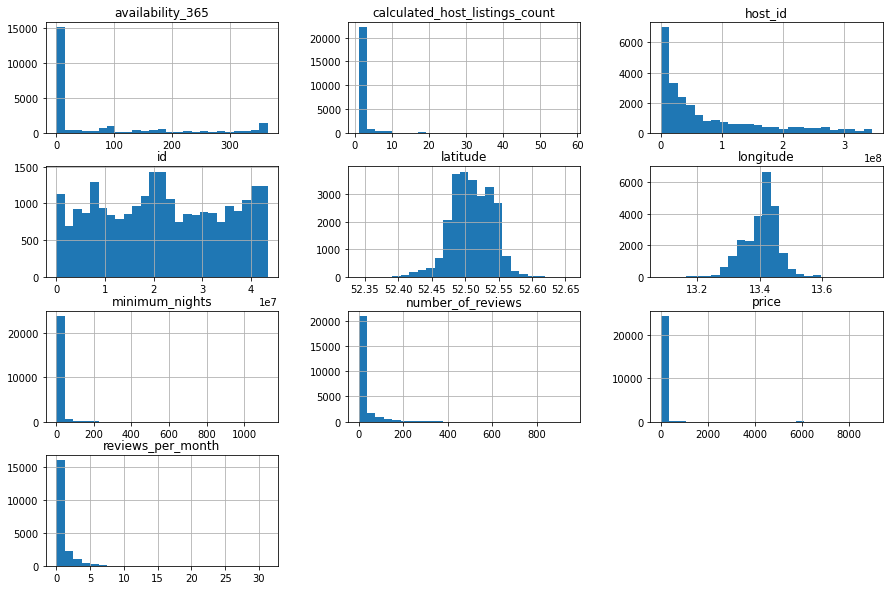

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=25, figsize=(15,10));

### **Q4. Existem outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24678.000000,24678.000000,24678.000000,20142.000000,24678.000000,24678.000000
mean,75.109409,7.394035,20.983305,0.850179,2.511468,75.013615
std,239.989351,27.988944,45.607124,1.274689,5.652053,118.603012
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,50.000000,3.000000,5.000000,0.370000,1.000000,0.000000
75%,79.000000,4.000000,18.000000,1.010000,2.000000,108.000000
max,9000.000000,1124.000000,950.000000,31.290000,58.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 79, porém seu valor máximo é 9000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

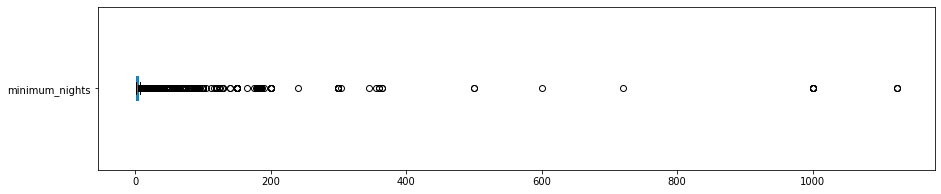

minimum_nights: valores acima de 30:
909 entradas
3.6834%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para `price`

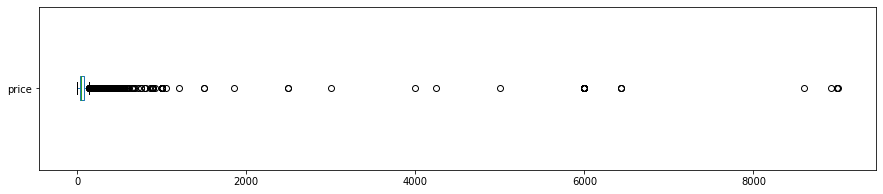


price: valores acima de 400
189 entradas
0.7659%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 400 para price
print("\nprice: valores acima de 400")
print("{} entradas".format(len(df[df.price > 400])))
print("{:.4f}%".format((len(df[df.price > 400]) / df.shape[0])*100))



### **Q5. Qual a média dos preços de aluguel?**
Analisando mais a fundo o que foi observado acima, podemos concluir que o preço médio em Berlin é de 75,11 Euros, mas esta média é puxada para cima devido ao preço máximo de 9000 Euros.

Neste caso podemos verificar a mediana (preço que está localizado no ponto médio da amostra) e a moda (valor que mais se repete na amostra).
Tanto a mediana quanto a moda retornaram o valor de 50 Euros

In [11]:
# ver a média da coluna `price``

print('O preço médio é de {} Euros'.format(df.price.mean()))
print('A mediana do preço é {} Euros'.format(df.price.median()))
print('A moda do preço é {} Euros'.format(df.price.mode()[0]))


O preço médio é de 75.10940919037199 Euros
A mediana do preço é 50.0 Euros
A moda do preço é 50 Euros


### **Q6 Removendo Outliers**
Agora que já foi comprovada a presença de outliers e no exemplo acima foi demonstrado como eles afetam o resultado, é hora de remover os Outliers e plotar novamente o histograma.



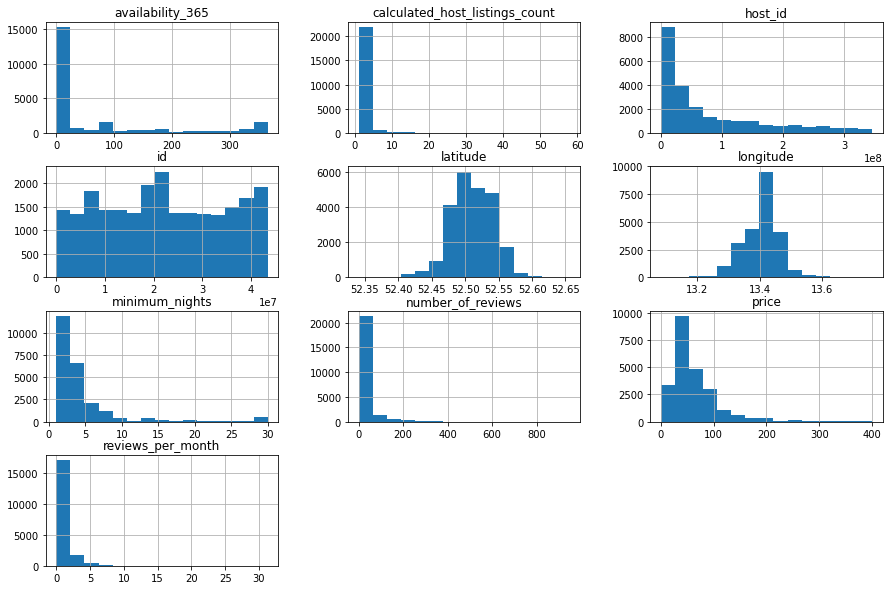

In [12]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)



# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q7. Qual a correlação existente entre as variáveis**
Verificar quanto uma variável tem correlação com outra, o intuito é verificar se o aumento de uma variável influencia diretamente no aumento ou decrescimo de outra.

__*Sempre importante lembrar, que correlação não necessariamente significa causalidade*__

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [13]:
# criar uma matriz de correlação
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.036385,0.077343,0.098066,0.164699,0.242942
minimum_nights,-0.036385,1.000000,-0.092318,-0.139658,0.055881,0.054474
number_of_reviews,0.077343,-0.092318,1.000000,0.751602,0.077386,0.282807
reviews_per_month,0.098066,-0.139658,0.751602,1.000000,0.143778,0.298473
calculated_host_listings_count,0.164699,0.055881,0.077386,0.143778,1.000000,0.281153
availability_365,0.242942,0.054474,0.282807,0.298473,0.281153,1.000000


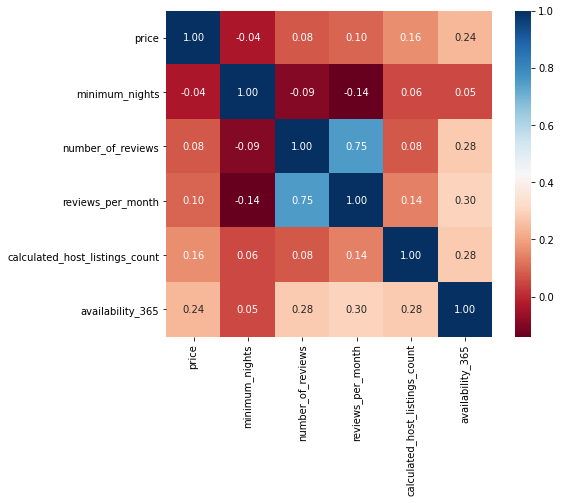

In [14]:
# plotar um heatmap a partir das correlações
fig= plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já utilizou-se do serviço, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    11891
Private room       11225
Shared room          294
Hotel room           173
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / len(df_clean)

Entire home/apt    0.504219
Private room       0.475978
Shared room        0.012467
Hotel room         0.007336
Name: room_type, dtype: float64

Aproximadamente 98% dos aluguéis são do imóvel inteiro ou quarto privado, 50.4% e 47,6% repectivamente

### **Q9. Qual a localidade mais cara do dataset?**

Podemos verficar que a média das 4 regiões mais caras são muito parecidas, sendo a região central a primeira colocada.

Podemos ver pelo gráfico de histograma que não há nenhum bairro com uma distribuição muito diferente um do outro.


neighbourhood_group
Mitte                       70.917953
Charlottenburg-Wilm.        69.577106
Pankow                      67.819478
Spandau                     65.368056
Tempelhof - Schöneberg      62.195388
Friedrichshain-Kreuzberg    62.022319
Marzahn - Hellersdorf       61.354839
Steglitz - Zehlendorf       60.844864
Treptow - Köpenick          57.045977
Lichtenberg                 51.514725
Neukölln                    50.023461
Reinickendorf               46.178571
Name: price, dtype: float64

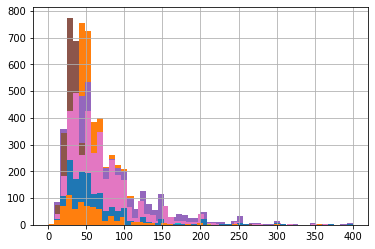

In [48]:
# ver preços por região, na média
agrupamento = df_clean.groupby('neighbourhood_group')
display(agrupamento.price.mean().sort_values(ascending=False))
agrupamento.price.hist(bins=50);

<Figure size 1080x864 with 0 Axes>

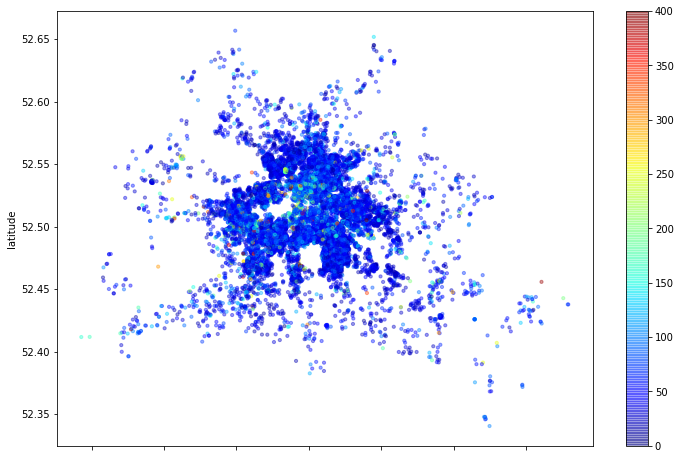

In [29]:
fig=plt.figure(figsize=(15,12));
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=10,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q10. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Apesar de a média de número de noites minimas ser de 4 dias, você pode alugar um imovél no AirBnb em Berlin para se hospedar apenas no final de semana,

Como demonstrado a baixo a maioria dos imóveis requer apenas o minimo de 2 dias

In [65]:
# ver a média da coluna `minimum_nights`
print('A média de noites minimas é de {} dias'.format(round(df_clean.minimum_nights.mean(),2)))
print('\nA quantidade de noites minimas da maioria dos imóveis são de {} dias'.format(df_clean.minimum_nights.mode()[0]))


A média de noites minimas é de 4.02 dias

A quantidade de noites minimas da maioria dos imóveis são de 2 dias



## Conclusões


Berlin é uma cidade muito plural, muito agitada e muito tranquila, atende por todos os gostos e necessidades.

Com o AirBnB não seria diferente, conclui-se que há uma equalização de preços em toda a cidade, não grandes valores de preços e de noites minimas de acordo com cada região da cidade.

Portanto aproveite a sua viagem e não se esqueça de visitar os principais pontos turisticos como:
* **Reichstag** (não se esqueça de fazer a reserva on-line)
* **Siegesäule** (Foto da introdução)
* **Tiergarten**
* **Brandenburg Tor**
* **Berliner Mauer**
* **Alexander Platz**
* **Frauenkirche**
* **e vários outros...**

Boa viagem e boa estadia!

